In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,models,layers

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Text(0.5, 0, '5')

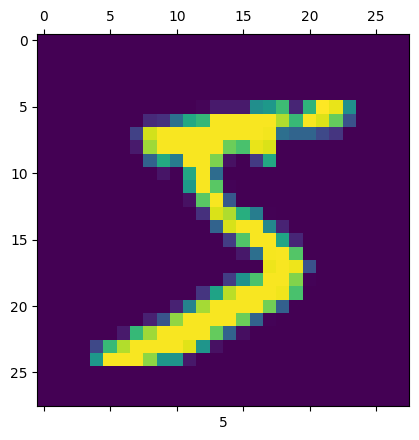

In [10]:
plt.matshow(x_train[0])
plt.xlabel(y_train[0])

In [13]:
#cnn application
cnn = models.Sequential([
    #convolutional layer
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    #pooling layer
    layers.MaxPooling2D((2,2)),

    #convolutional layer
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    #pooling layer
    layers.MaxPooling2D((2,2)),

    #cnn layer
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1466 - accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0478 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0095 - accuracy: 0.9968
Epoch 10/10
1875/1875 [==============================] - 41s 22m

In [14]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0295 - accuracy: 0.9912


[0.029481543228030205, 0.9911999702453613]

In [25]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [26]:
y_pred[:5]

array([[2.08863959e-12, 1.39092959e-10, 1.37957679e-13, 1.39272482e-09,
        2.55437249e-09, 8.35757516e-13, 1.81879861e-17, 9.99998391e-01,
        2.94074444e-12, 1.49106904e-06],
       [2.35081295e-11, 3.64988725e-12, 9.99999940e-01, 4.37604135e-19,
        4.97531758e-13, 2.64761612e-22, 1.77052284e-09, 1.36231120e-12,
        6.82060702e-15, 5.46938955e-19],
       [5.10878926e-12, 9.99998510e-01, 6.27506793e-08, 8.38106982e-14,
        9.09025175e-07, 2.93833707e-10, 3.88865662e-10, 2.48062921e-08,
        4.18476105e-07, 1.96411134e-11],
       [9.99999106e-01, 5.69764369e-14, 7.84264209e-10, 6.84743798e-12,
        6.65403659e-13, 8.00506594e-09, 8.61979743e-07, 1.05454749e-10,
        2.59181054e-09, 2.30132047e-09],
       [1.58010345e-12, 1.66511282e-12, 2.33988495e-10, 5.45897541e-16,
        9.99999821e-01, 1.43405765e-11, 9.91874013e-11, 2.51193857e-11,
        1.57436065e-12, 1.42268618e-07]], dtype=float32)

In [21]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [22]:
y_pred_classes[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

3